# Task_#4_Vysotskiy_Roman_Group_j4132c

# Import libraries

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Task 4
## 1. Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule
#### data: bioresponse.csv,
#### description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”).
#### Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.
## 2. Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.
## 3. For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values ​​of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model?
## 4. Compare the accuracy of the models fitted with various BP algorithms.

# Part 1

In [2]:
data = pd.read_csv('bioresponse.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [106]:
x = data.loc[:, data.columns !='Activity'] # our data and features
y = data['Activity'].values # our target/classes

# Make train and test sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state = 1)

## Activation function

In [74]:
# sigmoid
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    return s

## Propogation

In [239]:
# initialize_with_zeros
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim, 1))
    b = 0.
    return w, b

In [76]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]
    #print('number of objects = ',len(X))

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A), axis=1)   # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

## Optimization functions

In [139]:
# Gradient Descent
def gradient_descent(w, b, X, Y, num_iterations, learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        costs.append(cost)

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

# Part 2

In [235]:
# Stochastic gradient descent

def sgd(w, b, X, Y, num_iterations, learning_rate):

    costs = []
    batch_size = int(X.shape[1]*0.25)

    for i in range(num_iterations):
        #Cost and gradient calculation

        mini_batch = np.random.choice(X.shape[1], batch_size, replace=False)

        mini_batch_x = np.take(X, mini_batch, axis=1)
        mini_batch_y = np.take(Y, mini_batch, axis=0)

        grads, cost = propagate(w, b, mini_batch_x, mini_batch_y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        costs.append(cost)

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [248]:
# Adam

def adam(w, b, X, Y, num_iterations, learning_rate):
    # parameters
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8
    gamma = 0.95 # recommended value for good results

    dims = w.shape[0]
    velocity_dw, velocity_db = np.zeros((dims,1)), np.zeros((1,1))
    s_dw, s_db = np.zeros((dims,1)), np.zeros((1,1))

    costs = []

    for t in range(1, num_iterations + 1):
        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        velocity_dw = beta1*velocity_dw + (1 - beta1)*dw
        velocity_db = beta1*velocity_db + (1 - beta1)*db

        s_dw = beta2*s_dw + (1 - beta2)*dw**2
        s_db = beta2*s_db + (1 - beta2)*db**2

        vt_corr_dw = velocity_dw / (1 - gamma**t)
        vt_corr_db = velocity_db / (1 - gamma**t)

        st_corr_dw = s_dw / (1 - gamma**t)
        st_corr_db = s_db / (1 - gamma**t)

        w -= learning_rate*vt_corr_dw / (np.sqrt(st_corr_dw) + eps)
        b -= learning_rate*vt_corr_db / (np.sqrt(st_corr_db) + eps)

        # Record the costs
        costs.append(cost)

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

## Predict function

In [187]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction

In [191]:
# model

def regression(optimize_func, X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize_func(w, b, X_train, Y_train, num_iterations, learning_rate)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Accuracy
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100

    # print(train_accuracy, test_accuracy)

    d = {"Optimize function": optimize_func.__name__,
         "costs": costs,
         "Y_prediction_train": Y_prediction_train,
         "Y_prediction_test" : Y_prediction_test,
         "Train accuracy": train_accuracy,
         "Test accuracy": test_accuracy,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

# Part 3

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_30342/623764818.py:24: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A), axis=1)   # compute cost
/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_30342/623764818.py:24: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A), axis=1)   # compute cost
/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_30342/3780845084.py:10: RuntimeWarning: overflow encountered in exp
  s = 1./(1.+np.exp(-z))


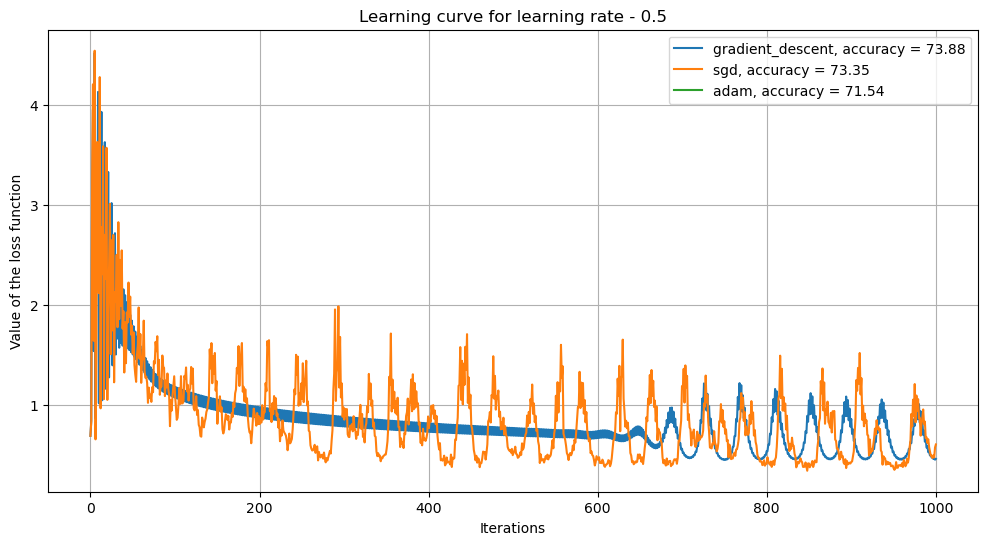

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_30342/623764818.py:24: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A), axis=1)   # compute cost
/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_30342/623764818.py:24: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A), axis=1)   # compute cost


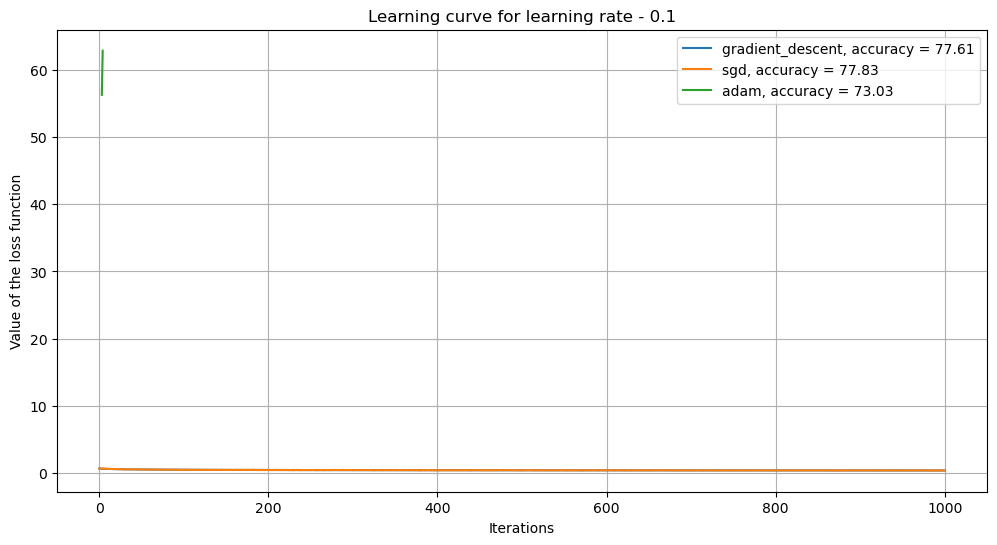

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_30342/623764818.py:24: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A), axis=1)   # compute cost
/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_30342/623764818.py:24: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A), axis=1)   # compute cost


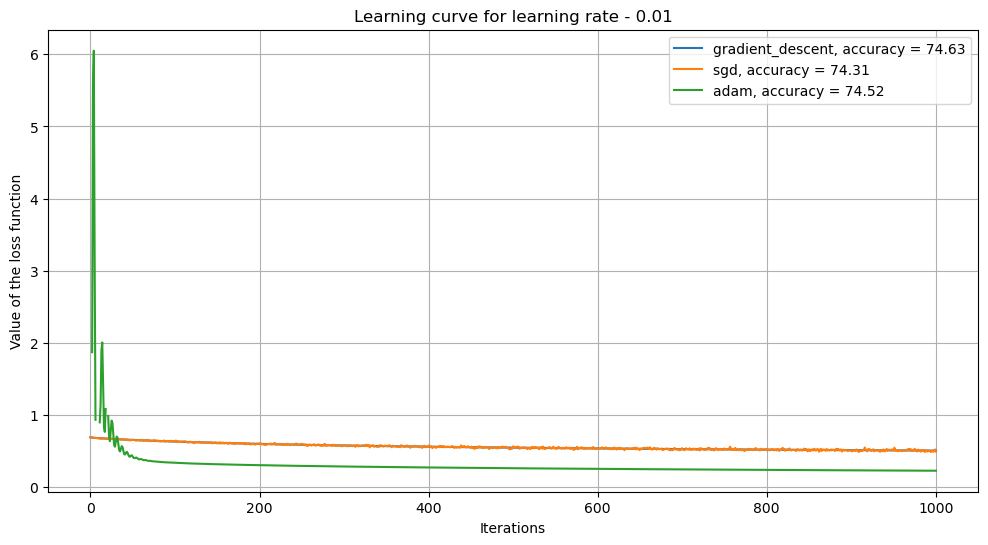

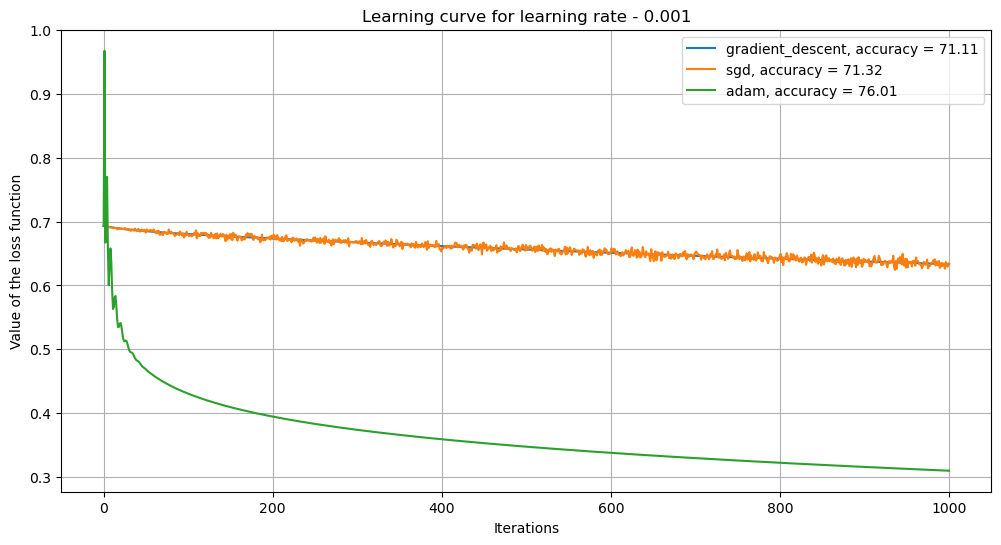

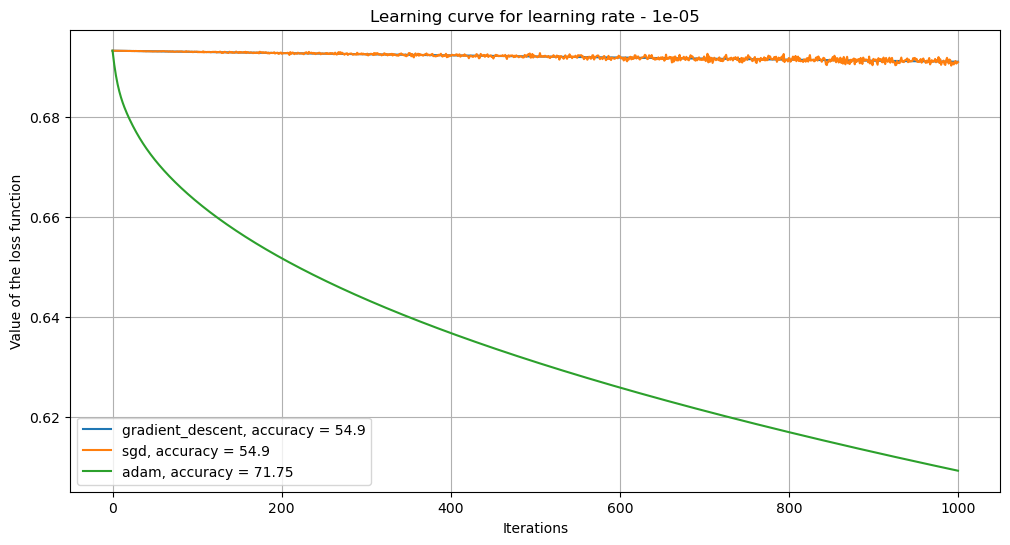

In [250]:
learning_rates = [0.5, 0.1, 0.01, 0.001, 0.00001]
optim_func = [gradient_descent, sgd, adam]
results = []
iterations = 1000

for i in range(len(learning_rates)):
    models = []
    for func in optim_func:
        model = regression(func, train_x.T, train_y.T, test_x.T, test_y.T, num_iterations = iterations, learning_rate = learning_rates[i])
        models.append(model)
    results.append(models)

    #plotting learning curves
    x = np.linspace(0, iterations, iterations)
    plt.figure(figsize=(12, 6))
    plt.plot(x, models[0]["costs"], label = f'{models[0]["Optimize function"]}, accuracy = {round(models[0]["Test accuracy"], 2)}')
    plt.plot(x, models[1]["costs"], label = f'{models[1]["Optimize function"]}, accuracy = {round(models[1]["Test accuracy"], 2)}')
    plt.plot(x, models[2]["costs"], label = f'{models[2]["Optimize function"]}, accuracy = {round(models[2]["Test accuracy"], 2)}')

    plt.title(f'Learning curve for learning rate - {learning_rates[i]}')
    plt.xlabel('Iterations')
    plt.ylabel('Value of the loss function')
    plt.legend()
    plt.grid()
    plt.show()

### As we can see, on low number of iteration gradient descent and his modification (SGD) take leader position - find minimal loss value faster, they are more stable, they have the highest accuracy score. Adam algorithm goes at the end with lower accuracy score, but since LR starts decrease leader table changes. It is also strange that Adam has Nan value with high LR after several iterations or on the second iteration (when LR equals 0.05).
### Adam algorithm shows all his potential on small LR, in that case it founds the minimal loss value much faster with big difference in accuracy score.

# Part 4

In [255]:
for i in range(3):
    print(f'Algorithm - {results[0][i]["Optimize function"]}')
    for j in range(len(learning_rates)):
        print(f'With learning rate equals {results[j][i]["learning_rate"]} accuracy is - {results[j][i]["Test accuracy"]}')
    print('----------------------------', '\n')

Algorithm - gradient_descent
With learning rate equals 0.5 accuracy is - 73.88059701492537
With learning rate equals 0.1 accuracy is - 77.61194029850746
With learning rate equals 0.01 accuracy is - 74.6268656716418
With learning rate equals 0.001 accuracy is - 71.1087420042644
With learning rate equals 1e-05 accuracy is - 54.90405117270789
---------------------------- 

Algorithm - sgd
With learning rate equals 0.5 accuracy is - 73.34754797441364
With learning rate equals 0.1 accuracy is - 77.82515991471215
With learning rate equals 0.01 accuracy is - 74.30703624733476
With learning rate equals 0.001 accuracy is - 71.32196162046908
With learning rate equals 1e-05 accuracy is - 54.90405117270789
---------------------------- 

Algorithm - adam
With learning rate equals 0.5 accuracy is - 71.53518123667376
With learning rate equals 0.1 accuracy is - 73.02771855010661
With learning rate equals 0.01 accuracy is - 74.52025586353945
With learning rate equals 0.001 accuracy is - 76.012793176972

### As we saw on the graphs since learning rate decreased, accuracy score for gradient descent and stochastic GD decreased too. Opposite situation for Adam algorithm.

# Conclusion

### During this work we saw application of three optimization algorithm in classification task with logistic regression method and several learning rates on real data. By several learning rates we investigated optimal LR for each algorithm. However, there is no one correct answer what algorithm fits your case better, it depends on the task, limitations and other details.